In [18]:
import os
import numpy as np
import netCDF4 as nc4
import shutil
import warnings
warnings.filterwarnings('ignore')
import xarray as xr



In [19]:
from matplotlib import pyplot as plt

In [20]:
sgpath='/glade/u/home/rfisher/rosiefork_fates_global_cal/rosie_ppe/sgmap.nc'

In [26]:
def get_map(da,sgmap=None):
    if not sgmap:
        sgmap=xr.open_dataset(sgpath)
    return da.sel(gridcell=sgmap.cclass).where(sgmap.notnan).compute()

In [22]:
filename1= '/glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin1/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin1.clm2.h0.0004-02-01-00000.nc'
da1=xr.open_mfdataset(filename1, decode_times=False)
mapped_da1=get_map(da1)

filename2= '/glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin2/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin2.clm2.h0.0004-02-01-00000.nc'
da2=xr.open_mfdataset(filename2, decode_times=False)
mapped_da2=get_map(da2)

In [24]:
diff=np.nanmean(mapped_da1.FATES_LAI,0)-np.nanmean(mapped_da2.FATES_LAI,0)
diff = np.flip(diff,0)


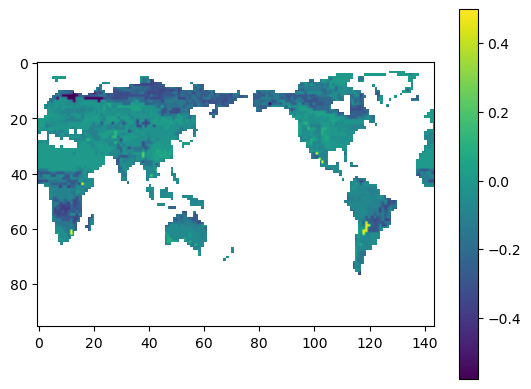

In [25]:
plt.imshow(diff)
plt.colorbar()